In [343]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# sklearn imports
from sklearn import linear_model
from sklearn import metrics

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

# visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


In [344]:
df = pd.read_csv('DF_After_DataCleaning.csv')

In [345]:
df

,Title,Year,Duration,MostLiked,Description,Director,FullCast,GenreFull,AboutFull,Age
0,The Adam Project,2022.0,106,0.0,"After accidentally crash-landing in 2022, time...",['Shawn Levy'],"['Ryan Reynolds,', 'Mark Ruffalo,', 'Jennifer ...","['Sci-Fi Movies,', 'Family Movies,', 'Action &...","['Witty,', 'Feel-Good,', 'Exciting']",13
1,Interstellar,2014.0,169,1.0,With humanity teetering on the brink of extinc...,['Christopher Nolan'],"['Matthew McConaughey,', 'Anne Hathaway,', 'Je...","['Sci-Fi Movies,', 'Action & Adventure,', 'Dra...","['Mind-Bending,', 'Cerebral']",13
2,Red Notice,2021.0,118,0.0,An FBI profiler pursuing the world's most want...,['Rawson Marshall Thurber'],"['Dwayne Johnson,', 'Ryan Reynolds,', 'Gal Gad...","['Action & Adventure,', 'Comedies,', 'Crime Mo...","['Irreverent,', 'Exciting']",13
3,Abduction,2011.0,105,0.0,When a teen comes across his own childhood pho...,['John Singleton'],"['Taylor Lautner,', 'Lily Collins,', 'Alfred M...","['Mysteries,', 'Action & Adventure']","['Suspenseful,', 'Exciting']",13
4,13 Hours: The Secret Soldiers of Benghazi,2016.0,145,0.0,Members of an elite security team battle to sa...,['Michael Bay'],"['John Krasinski,', 'James Badge Dale,', 'Max ...","['Military Movies,', 'Movies Based on Real Lif...","['Gritty,', 'Exciting']",16
...,...,...,...,...,...,...,...,...,...,...
2625,Aaviri,2019.0,109,0.0,"After losing their first child in an accident,...",['Ravi Babu'],"['Ravi Babu,', 'Neha Chauhan,', 'Sri Muktha,',...","['Indian,', 'Telugu-Language Movies,', 'Thrill...","['Ominous,', 'Scary,', 'Suspenseful']",13
2626,Until Midnight,2019.0,77,0.0,"After returning home from a work trip, a newly...",['Tariq Alkazim'],"['Ahmad Khamis Ali,', 'Chuka Ekweogwu,', 'Heba...","['Emirati,', 'Middle Eastern Movies,', 'Thrill...",['Suspenseful'],13
2627,Kolaiyuthir Kaalam,2019.0,107,0.0,The speech-and-hearing-impaired heiress of a p...,['Chakri Toleti'],"['Nayanthara,', 'Bhoomika Chawla,', 'Prem Kath...","['Indian,', 'Tamil-Language Movies,', 'Thrille...",['Suspenseful'],16
2628,Boomika (Hindi),2021.0,122,0.0,"Paranormal activity at a lush, abandoned prope...",['Rathindran R Prasad'],"['Aishwarya Rajesh,', 'Vidhu,', 'Surya Ganapat...","['Indian,', 'Hindi-Language Movies,', 'Thrille...","['Scary,', 'Suspenseful']",13


In [346]:
#DESCRIPTION
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
textlist_Description = []
for cell in df['Description']:
        str1 = ""
        newstring = str1.join(cell)
        textlist_Description.append(newstring)
count_vec = CountVectorizer(stop_words="english", ngram_range=(0, 1), max_features=5000,min_df = 70)

count_vec.fit(textlist_Description)
text_vectorized2 = pd.DataFrame(count_vec.transform(textlist_Description).toarray(), columns=count_vec.get_feature_names())
text_vectorized2  # the table

,comedian,comedy,falls,family,father,finds,friend,friends,help,home,...,special,stand,takes,teen,time,woman,world,year,years,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2626,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
#CAST
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

text_list_cast = []
for name in df['FullCast']:
        str2 = ""
        newstring1 = str2.join(name)
        text_list_cast.append(newstring1)



#create columns for each name 
count_vec1 = CountVectorizer(stop_words="english", ngram_range=(2, 2), max_features=5000,min_df = 20)

count_vec1.fit(text_list_cast)
text_vectorized3 = pd.DataFrame(count_vec1.transform(text_list_cast).toarray(), columns=count_vec1.get_feature_names())
text_vectorized3

,julie tejwani,rukh khan,rupa bhimani,shah rukh
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2625,0,0,0,0
2626,0,0,0,0
2627,0,0,0,0
2628,0,0,0,0


In [348]:
#Genre

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

text_list_GenreFull = []
for Category in df['GenreFull']:
        str3 = ""
        newstring2= str3.join(Category)
        text_list_GenreFull.append(newstring2)


#create columns for each name 
count_vec2 = CountVectorizer(stop_words="english", ngram_range=(2, 2), max_features=5000,min_df = 400)

count_vec2.fit(text_list_GenreFull)
text_vectorized4 = pd.DataFrame(count_vec2.transform(text_list_GenreFull).toarray(), columns=count_vec2.get_feature_names())
text_vectorized4
        

,action adventure,language movies,romantic movies
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2625,0,1,0
2626,0,0,0
2627,0,1,0
2628,0,1,0


In [349]:
#about 
textlist_AboutFull = []
for subject in df['AboutFull']:
        str5 = ""
        newstring4 = str5.join(subject)
        textlist_AboutFull.append(newstring4)

count_vec4 = CountVectorizer(stop_words="english", ngram_range=(2, 2), max_features=5000,min_df = 65)

count_vec4.fit(textlist_AboutFull)
text_vectorized5 = pd.DataFrame(count_vec4.transform(textlist_AboutFull).toarray(), columns=count_vec4.get_feature_names())
text_vectorized5  # the table

,emotional romantic,feel good,heartfelt feel,raunchy irreverent,witty irreverent
0,0,1,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2625,0,0,0,0,0
2626,0,0,0,0,0
2627,0,0,0,0,0
2628,0,0,0,0,0


In [350]:
df_new = pd.concat([df, text_vectorized2,text_vectorized4,text_vectorized3], axis=1, join='inner')

In [351]:
df_new

,Title,Year,Duration,MostLiked,Description,Director,FullCast,GenreFull,AboutFull,Age,...,year,years,young,action adventure,language movies,romantic movies,julie tejwani,rukh khan,rupa bhimani,shah rukh
0,The Adam Project,2022.0,106,0.0,"After accidentally crash-landing in 2022, time...",['Shawn Levy'],"['Ryan Reynolds,', 'Mark Ruffalo,', 'Jennifer ...","['Sci-Fi Movies,', 'Family Movies,', 'Action &...","['Witty,', 'Feel-Good,', 'Exciting']",13,...,1,0,0,1,0,0,0,0,0,0
1,Interstellar,2014.0,169,1.0,With humanity teetering on the brink of extinc...,['Christopher Nolan'],"['Matthew McConaughey,', 'Anne Hathaway,', 'Je...","['Sci-Fi Movies,', 'Action & Adventure,', 'Dra...","['Mind-Bending,', 'Cerebral']",13,...,0,0,0,1,0,0,0,0,0,0
2,Red Notice,2021.0,118,0.0,An FBI profiler pursuing the world's most want...,['Rawson Marshall Thurber'],"['Dwayne Johnson,', 'Ryan Reynolds,', 'Gal Gad...","['Action & Adventure,', 'Comedies,', 'Crime Mo...","['Irreverent,', 'Exciting']",13,...,0,0,0,1,0,0,0,0,0,0
3,Abduction,2011.0,105,0.0,When a teen comes across his own childhood pho...,['John Singleton'],"['Taylor Lautner,', 'Lily Collins,', 'Alfred M...","['Mysteries,', 'Action & Adventure']","['Suspenseful,', 'Exciting']",13,...,0,0,0,1,0,0,0,0,0,0
4,13 Hours: The Secret Soldiers of Benghazi,2016.0,145,0.0,Members of an elite security team battle to sa...,['Michael Bay'],"['John Krasinski,', 'James Badge Dale,', 'Max ...","['Military Movies,', 'Movies Based on Real Lif...","['Gritty,', 'Exciting']",16,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,Aaviri,2019.0,109,0.0,"After losing their first child in an accident,...",['Ravi Babu'],"['Ravi Babu,', 'Neha Chauhan,', 'Sri Muktha,',...","['Indian,', 'Telugu-Language Movies,', 'Thrill...","['Ominous,', 'Scary,', 'Suspenseful']",13,...,0,0,1,0,1,0,0,0,0,0
2626,Until Midnight,2019.0,77,0.0,"After returning home from a work trip, a newly...",['Tariq Alkazim'],"['Ahmad Khamis Ali,', 'Chuka Ekweogwu,', 'Heba...","['Emirati,', 'Middle Eastern Movies,', 'Thrill...",['Suspenseful'],13,...,0,0,0,0,0,0,0,0,0,0
2627,Kolaiyuthir Kaalam,2019.0,107,0.0,The speech-and-hearing-impaired heiress of a p...,['Chakri Toleti'],"['Nayanthara,', 'Bhoomika Chawla,', 'Prem Kath...","['Indian,', 'Tamil-Language Movies,', 'Thrille...",['Suspenseful'],16,...,0,0,0,0,1,0,0,0,0,0
2628,Boomika (Hindi),2021.0,122,0.0,"Paranormal activity at a lush, abandoned prope...",['Rathindran R Prasad'],"['Aishwarya Rajesh,', 'Vidhu,', 'Surya Ganapat...","['Indian,', 'Hindi-Language Movies,', 'Thrille...","['Scary,', 'Suspenseful']",13,...,0,0,0,0,1,0,0,0,0,0


In [352]:
#delete the column WRITER
df_new.drop('Description', inplace=True, axis=1)

In [353]:
#delete the column WRITER
df_new.drop('Director', inplace=True, axis=1)

In [354]:
#delete the column WRITER
df_new.drop('FullCast', inplace=True, axis=1)

In [355]:
#delete the column WRITER
df_new.drop('GenreFull', inplace=True, axis=1)

In [356]:
#delete the column WRITER
df_new.drop('AboutFull', inplace=True, axis=1)

In [357]:
#change the Titles to index
df_new = df_new.set_index('Title')

In [358]:
df_new

,Year,Duration,MostLiked,Age,comedian,comedy,falls,family,father,finds,...,year,years,young,action adventure,language movies,romantic movies,julie tejwani,rukh khan,rupa bhimani,shah rukh
Title,,,,,,,,,,,,,,,,,,,,,
The Adam Project,2022.0,106,0.0,13,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
Interstellar,2014.0,169,1.0,13,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Red Notice,2021.0,118,0.0,13,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Abduction,2011.0,105,0.0,13,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13 Hours: The Secret Soldiers of Benghazi,2016.0,145,0.0,16,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aaviri,2019.0,109,0.0,13,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
Until Midnight,2019.0,77,0.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kolaiyuthir Kaalam,2019.0,107,0.0,16,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [359]:
requires_n = df_new['MostLiked'].value_counts().min()
print(requires_n)
negative= df_new[df_new['MostLiked'] == 0].sample(n=requires_n)
positive = df_new[df_new['MostLiked'] == 1].sample(n=requires_n)
down_sampling_data = pd.concat([negative, positive])

51


In [360]:
down_sampling_data

,Year,Duration,MostLiked,Age,comedian,comedy,falls,family,father,finds,...,year,years,young,action adventure,language movies,romantic movies,julie tejwani,rukh khan,rupa bhimani,shah rukh
Title,,,,,,,,,,,,,,,,,,,,,
Hey Sinamika (Hindi),2022.0,147,0.0,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Ready to Mingle,2019.0,97,0.0,16,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Tony Robbins: I Am Not Your Guru,2016.0,116,0.0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IO,2019.0,96,0.0,13,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese,2019.0,142,0.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Klaus,2019.0,98,1.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrietty,2010.0,94,1.0,7,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
The Matrix,1999.0,136,1.0,16,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [361]:
y = down_sampling_data["MostLiked"].values
x = down_sampling_data.drop(["MostLiked"],axis=1)

In [362]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

In [363]:
train_MLiked = []
test_MLiked = []
k_values = []
for k in range(1, 25):
    k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    tr_MLiked = knn.score(x_train, y_train)
    train_MLiked.append(tr_MLiked)
    
    te_MLiked = knn.score(x_test, y_test)
    test_MLiked.append(te_MLiked)

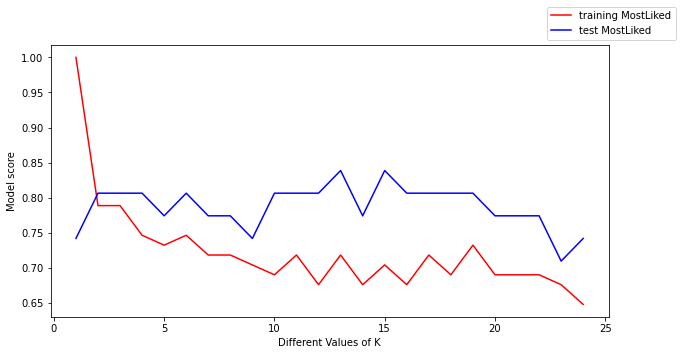

In [364]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_values, train_MLiked, color = 'r', label = "training MostLiked")
plt.plot(k_values, test_MLiked, color = 'b', label = 'test MostLiked')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [371]:
knn = KNeighborsClassifier(n_neighbors = 3)
#Fit the model
knn.fit(x_train,y_train)
#get the score
knn.score(x_test,y_test)

0.8064516129032258

In [366]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model_clf = dtree_model.fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.8064516129032258


In [367]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

In [368]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [369]:
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model_clf = dtree_model.fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.8064516129032258


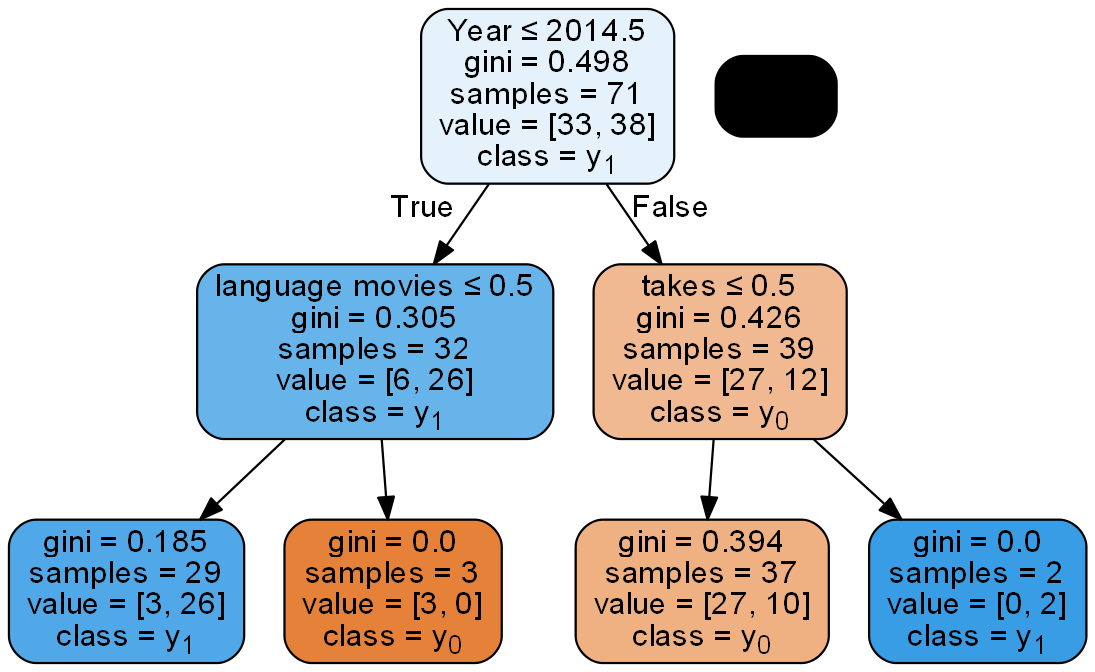

In [370]:
dot_data = StringIO()
export_graphviz(dtree_model_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
graph.set_size('"60,7!"')
graph.write_png('resized_tree.png')
Image(graph.create_png())